# Strain Gauge Lab
### 9.18.18   |   Jonathan Kelley   |  ISIM


Our goal for this lab is to use a strain gauge to create a simple scale circuit. 

We will learn how to use a voltage amplifier and capacitors to collect data from a strain sensor. 
We will also develop a calibration curve for our scale based on experimental data.

In [1]:
# Basic imports
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from scipy import stats

%matplotlib inline

### Importing and post processing data

To make data collection easier, I added weight after weight in a single run. We'll have to use some estimation and averaging to pull the right data out.

Let's load and plot the raw data.

In [2]:
# Load the Wavegen Data
file = "StrainGauge.csv"
data = pd.read_csv(file, skiprows = 8)

(0, 70)

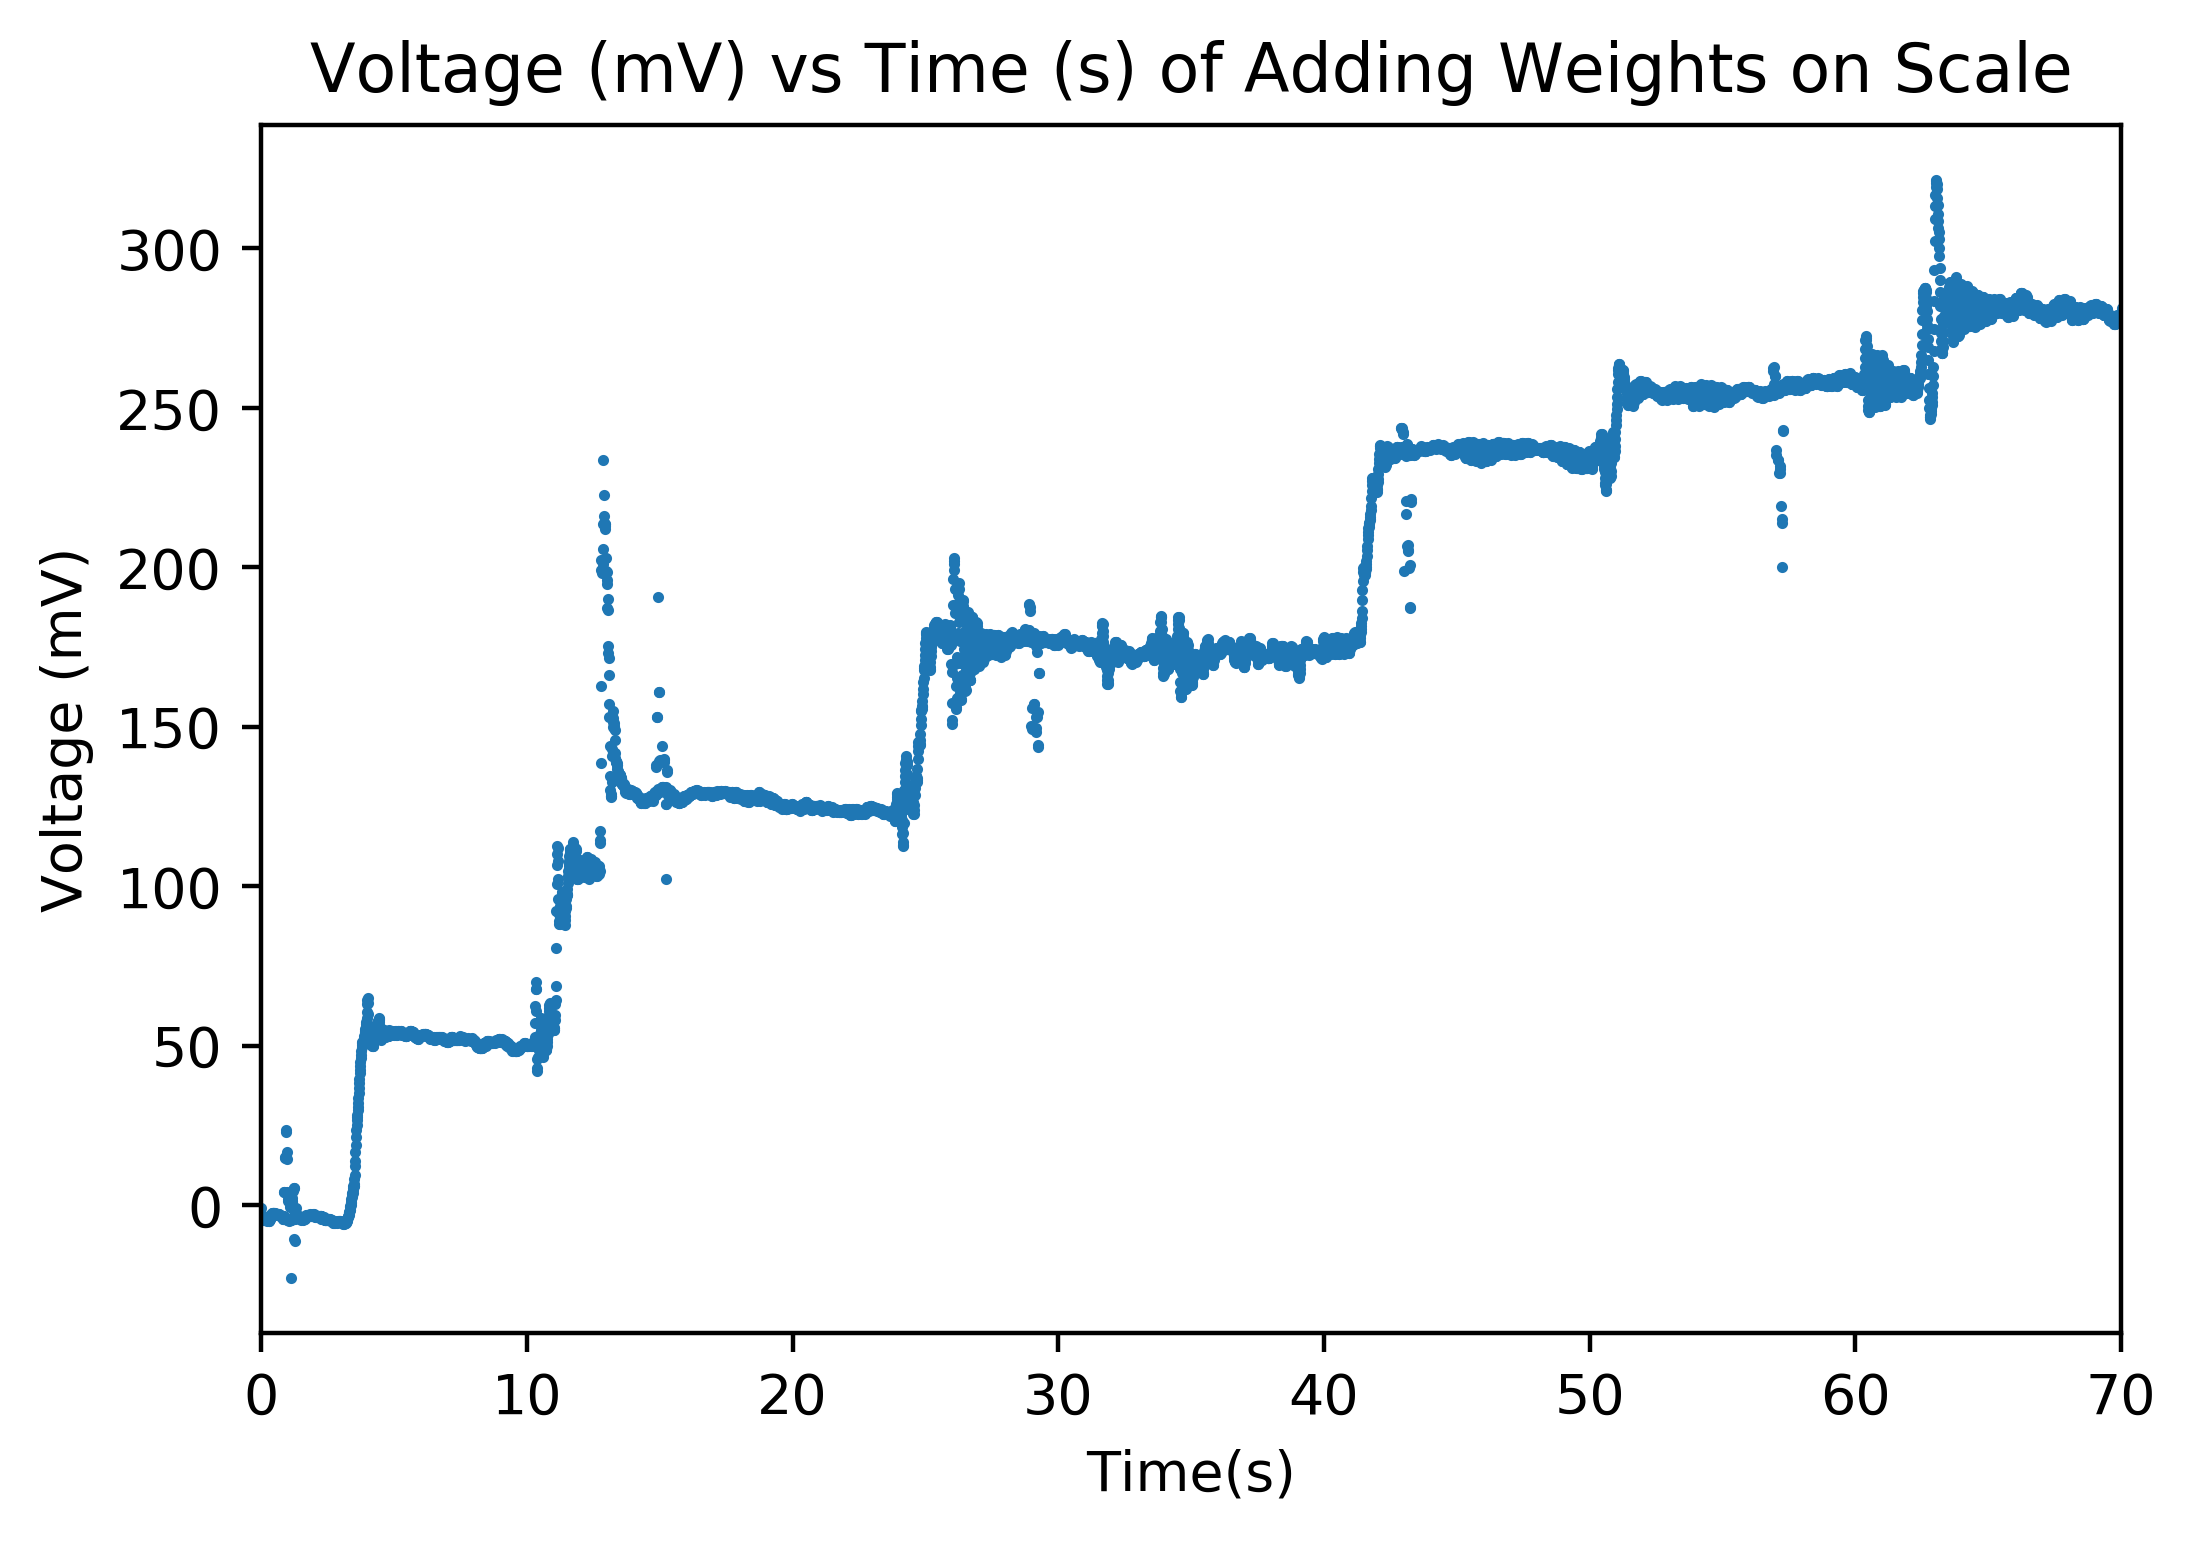

In [3]:
data["Time (s)"] = data["Time (s)"]+ 40
data["Strain (V)"] = data["Channel 2 (V)"] * 1000


plt.figure(dpi = 400)
plt.scatter(data["Time (s)"], data["Strain (V)"], s=1)
plt.title("Voltage (mV) vs Time (s) of Adding Weights on Scale")
plt.xlabel("Time(s)")
plt.ylabel("Voltage (mV)")
plt.xlim(0, 70)

### Calibration data

I added weight after weight to the scale in this order:

77.5 g, 76.5 g, 72.1 g, 79.2 g, 28.4 g, 28.4 g

We need to find the points that define the scale voltage for each weight. This can be done somewhat manually, but we can take some educated guesses based on the graph.

In [4]:
def get_median_from_time(data, t1, t2):
    return np.median(data[data['Time (s)'].between(t1, t2, inclusive = True)]["Strain (V)"])

In [5]:
calibrated_data = np.array([
    [(0), get_median_from_time(data, 0, 2)],
    [(77.5), get_median_from_time(data, 7, 10)],
    [(77.5+76.5), get_median_from_time(data, 16, 23)],
    [(77.5+76.5+72.1), get_median_from_time(data, 28, 40)],
    [(77.5+76.5+72.1+79.2), get_median_from_time(data, 45, 50)],
    [(77.5+76.5+72.1+79.2+28.4), get_median_from_time(data, 53, 60)],
    [(77.5+76.5+72.1+79.2+28.4+28.4), get_median_from_time(data, 65, 70)]])

Text(0.5,0,'Strain Gauge Voltage (mV)')

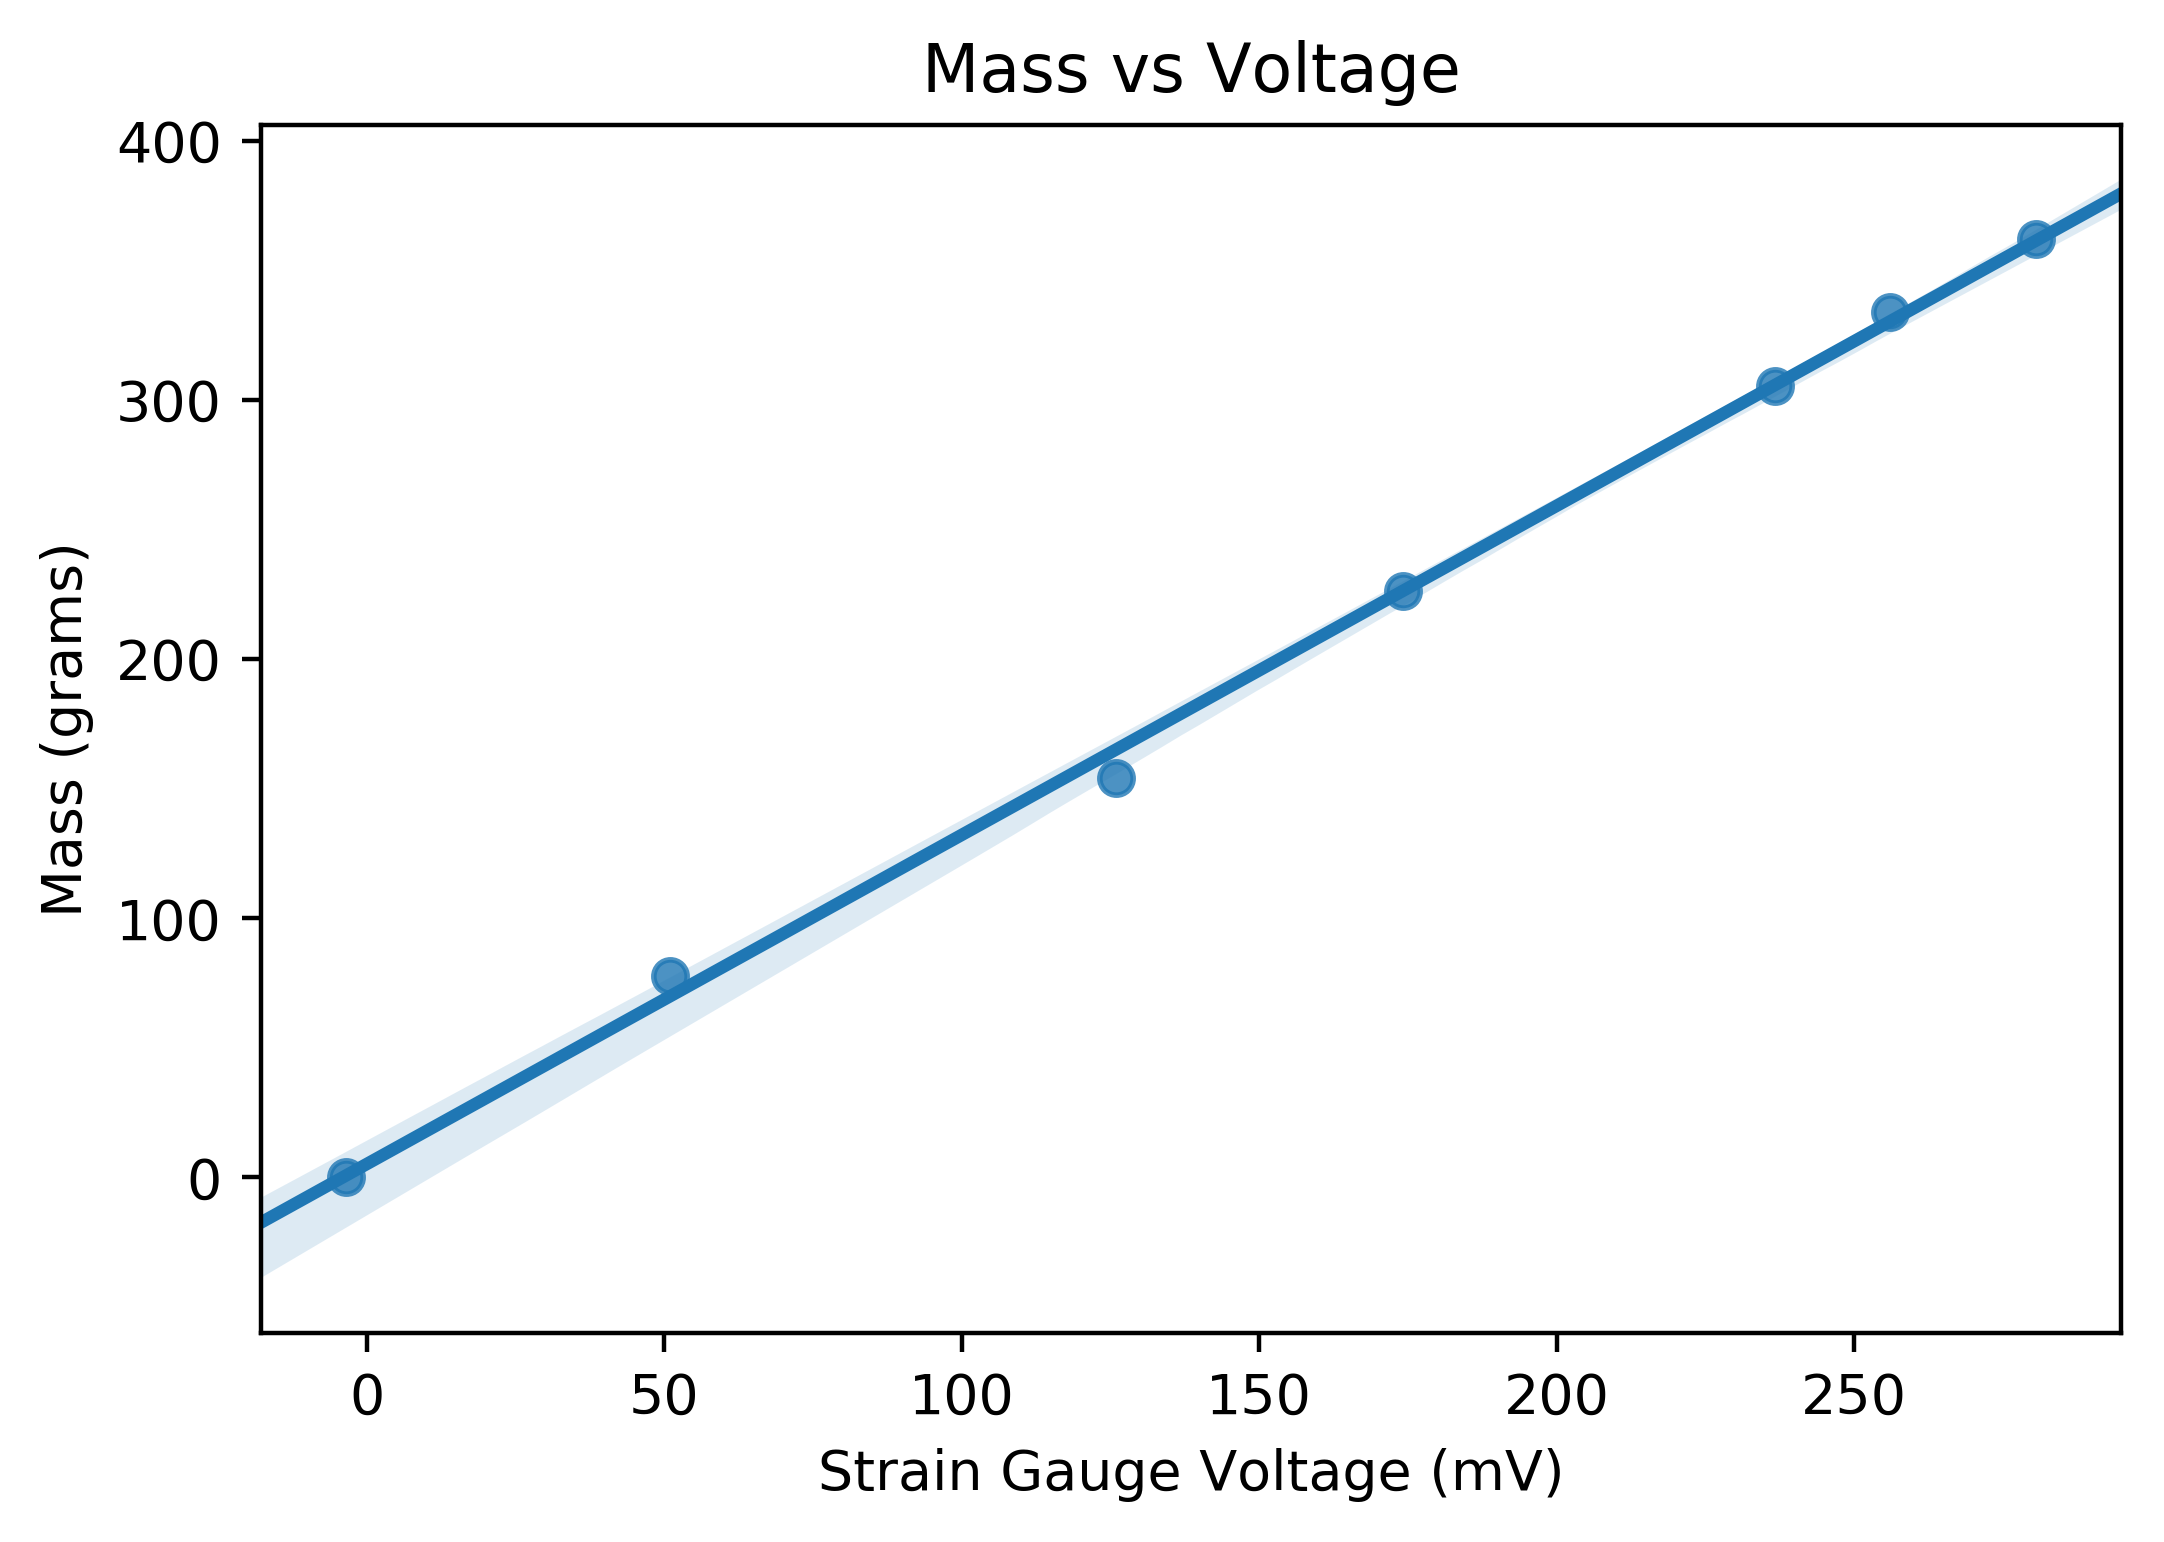

In [6]:
plt.figure(dpi = 400)
sb.regplot(calibrated_data[:,1], calibrated_data[:,0])
plt.title("Mass vs Voltage")
plt.ylabel("Mass (grams)")
plt.xlabel("Strain Gauge Voltage (mV)")

In [7]:
slope, intercept, r_value, p_value, std_err = stats.linregress(calibrated_data[:,1], calibrated_data[:,0])
slope

1.2703852653450975

In your lab report, discuss your scales sensitivity. For your circuit, a 20 mV change in the output voltage seems to be easily discernable. 

For a 20 mV change, 

1: What is the associated change in electrical resistance of the strain gauge? You will need to do a little analysis here. 

2: What is the mass that was applied to the scale to get this change of 20 mV on the output voltage?

To answer #1, we need to consider the resistance of the circuit - namely the proportion (divider) taken by the strain gauge. After tuning the circuit, my measured non-gauge resistance for that edge of the wheatstone bridge came out to 121.5 ohms. If the gauge was reading 20 mV, then the rest of the bridge would be experiencing a potential drop of 4.98 . The total resistance of the circuit would have increased proportionately to 122 ohms. 

Therefore, for every increase of 20 mV by the strain gauge, the resistance of the gauge increases by 0.5 ohms.

We can pretty easily answer #2 from above. Our analysis told us that the increase of 1 mV of strain gauge measurement is about equal to an increase of mass by 1.27 grams. So, for a 20 mV increase of output voltage, we would need to add about 25.4 grams of mass to the scale.
